In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 5000)

In [8]:
df = pd.read_csv("../data/combined.csv")
df

,Race,HIV (non-AIDS) Rate,AIDS Rate,HIV/AIDS Rate,Infant Mortality Rate,Insurance Application Rate,"Disease Rate per 100,000",Poverty Rate
0,American Indian and/or Alaska Native,118.6,164.3,282.9,5.35,1.88,133.13,20.2
1,Asian,34.9,48.9,83.8,2.95,3.28,76.71,11.5
2,Black or African American,370.1,595.5,965.7,11.12,5.66,307.39,21.4
3,Hispanic,98.8,164.0,262.8,5.07,4.98,99.63,20.9
4,Mixed Race,79.2,97.0,176.1,10.94,3.09,79.17,13.2
5,White,136.3,208.3,344.5,4.26,3.71,93.82,8.0


In [9]:
col_list = df.columns.tolist()[1:7]
col_list

['HIV (non-AIDS) Rate',
 'AIDS Rate',
 'HIV/AIDS Rate',
 'Infant Mortality Rate',
 'Insurance Application Rate',
 'Disease Rate per 100,000']

In [10]:
coeff_list = []
coeff_dict = {'Race': 'Correlation with Poverty Rate', 'Poverty Rate': 1}

for col in col_list:
    coeff = np.corrcoef(df['Poverty Rate'], df[col])[0][1]
    coeff_list.append(coeff)
    coeff_dict[col] = coeff
    
coeff_dict

{'Race': 'Correlation with Poverty Rate',
 'Poverty Rate': 1,
 'HIV (non-AIDS) Rate': 0.4813630976412349,
 'AIDS Rate': 0.4874782113190419,
 'HIV/AIDS Rate': 0.48553855074451135,
 'Infant Mortality Rate': 0.34515023052680244,
 'Insurance Application Rate': 0.3282841520630932,
 'Disease Rate per 100,000': 0.5924922625855076}

In [11]:
df = df.append(coeff_dict, ignore_index=True)
df

,Race,HIV (non-AIDS) Rate,AIDS Rate,HIV/AIDS Rate,Infant Mortality Rate,Insurance Application Rate,"Disease Rate per 100,000",Poverty Rate
0,American Indian and/or Alaska Native,118.600000,164.300000,282.900000,5.35000,1.880000,133.130000,20.2
1,Asian,34.900000,48.900000,83.800000,2.95000,3.280000,76.710000,11.5
2,Black or African American,370.100000,595.500000,965.700000,11.12000,5.660000,307.390000,21.4
3,Hispanic,98.800000,164.000000,262.800000,5.07000,4.980000,99.630000,20.9
4,Mixed Race,79.200000,97.000000,176.100000,10.94000,3.090000,79.170000,13.2
5,White,136.300000,208.300000,344.500000,4.26000,3.710000,93.820000,8.0
6,Correlation with Poverty Rate,0.481363,0.487478,0.485539,0.34515,0.328284,0.592492,1.0


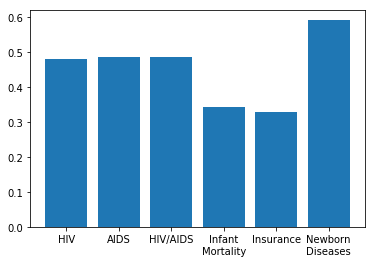

In [12]:
col_list = df.columns.tolist()[1:7]
x_ticks = ['HIV', 'AIDS', 'HIV/AIDS', 'Infant\nMortality', 'Insurance', 'Newborn\nDiseases']
coeffs = df.loc[df['Race'] == 'Correlation with Poverty Rate'].values[0].tolist()[1:7]

plt.bar(col_list, coeffs)
plt.xticks(col_list, x_ticks)
plt.show()

In [21]:
alt_dict = {'Value': [], 'Correlation with Poverty Rate': []};

for key in coeff_dict:
    alt_dict['Correlation with Poverty Rate'].append(coeff_dict[key])
    alt_dict['Value'].append(key)
    
alt_dict['Correlation with Poverty Rate'] = alt_dict['Correlation with Poverty Rate'][2:]
alt_dict['Value'] = alt_dict['Value'][2:]

correlations = pd.DataFrame(alt_dict)
correlations

,Value,Correlation with Poverty Rate
0,HIV (non-AIDS) Rate,0.481363
1,AIDS Rate,0.487478
2,HIV/AIDS Rate,0.485539
3,Infant Mortality Rate,0.345150
4,Insurance Application Rate,0.328284
5,"Disease Rate per 100,000",0.592492


In [23]:
correlations.to_csv("../data/cleaned/correlations.csv", index=False)